In [4]:
import pandas as pd

# Read the Excel data into a pandas DataFrame
df = pd.read_excel('RESULTS.xlsx')
df = df.replace(to_replace=2, value=0)
df = df.replace(to_replace=-1, value=None)
df[['number','date and time', 'time', 'condition']] = df[['number','date and time', 'time', 'condition']].astype(str)
df['score'] = df.sum(axis=1, numeric_only=True)
df = df[['number', 'date and time', 'time', 'condition', 'score']]
df.dropna(axis=0, how='any', inplace=True)
df = df.drop(df[df['number'] == 'nan'].index)

65


C:\Users\beau\AppData\Local\Temp\ipykernel_20536\1906096213.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['score'] = df.sum(axis=1, numeric_only=True)


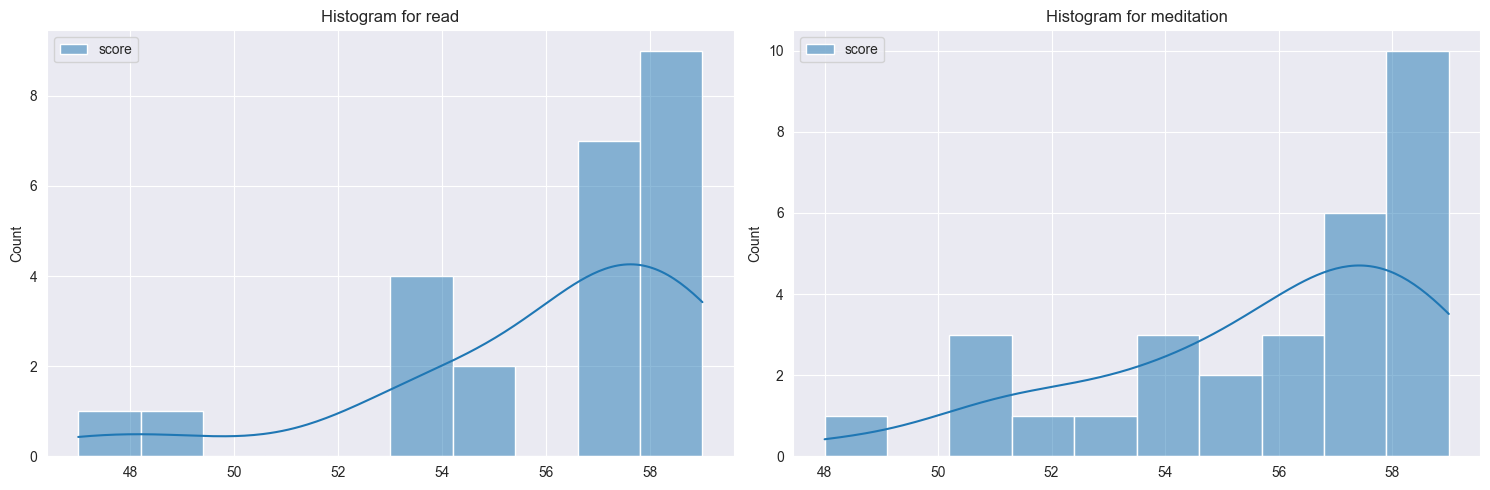

In [14]:
# Create a 1x3 grid of subplots
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot histogram for 'beta'
sns.histplot(data=df[df['condition']=='read'], kde=True, bins=10, ax=axes[0])
axes[0].set_title('Histogram for read')

# Plot histogram for 'theta'
sns.histplot(data=df[df['condition']=='med'], kde=True, bins=10, ax=axes[1])
axes[1].set_title('Histogram for meditation')

# Adjust layout
plt.tight_layout()

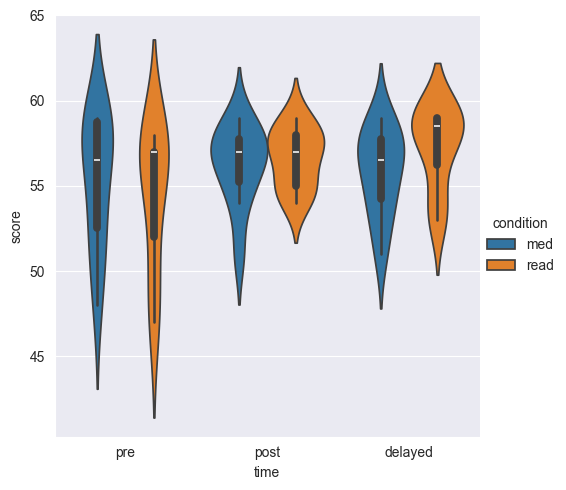

In [15]:
sns.catplot(data=df, x="time", y="score", kind='violin', hue="condition")